In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
ROAD_TYPE = "RoadType"
AHEAD_DISTANCE = "Z_ABST_toAT[m]"

In [62]:
df = pd.read_csv("../data/original/R5_L53E-DM05_2119_20161103140831.csv")

IOError: File ../data/original/R5_L53E-DM05_2119_20161103140831.csv does not exist

In [63]:
Accel = "RawPedal_APOFS[%]"
Brake = "BRKSWTM"

In [4]:
for c in df.columns:
    print c

Time
YEAR[year]
SEC[sec]
MONTH[month]
MINUTE[min]
HOUR[hour]
DAY[day]
STAT
GPS_S_NUM
LON_GPS[deg]
LAT_GPS[deg]
ALT[m]
GPS_TMP2
GPS_TMP1
ALTITUDE
AZIMUTH
SPEED
VSP40_MET[km/h]
VS_DISP
VSO[km/h]
V_APO[%]
BRKSWTM
PSS_02[bar]
YAW_RATE_02[deg/s]
TRANS_ACC_02[G]
LONG_ACC_02[G]
RawPedal_APOFS[%]
TACHO[Tr/min]
TTEPTD_ETRQDR[Nm]
ErgonomicPedal_ATAPOST[%]
TENG2[Nm]
Z_ABST_toAT[m]
TWN[degC]
CURGPV
TIM_FINE[mm3]
Curve_20[Ѓгm]
Curve_19[Ѓгm]
Curve_18[Ѓгm]
Curve_17[Ѓгm]
Curve_16[Ѓгm]
Curve_15[Ѓгm]
Curve_14[Ѓгm]
Curve_13[Ѓгm]
Curve_12[Ѓгm]
Curve_11[Ѓгm]
Curve_10[Ѓгm]
Curve_9[Ѓгm]
Curve_8[Ѓгm]
Curve_7[Ѓгm]
Curve_6[Ѓгm]
Curve_5[Ѓгm]
Curve_4[Ѓгm]
Curve_3[Ѓгm]
Curve_2[Ѓгm]
Curve_1[Ѓгm]
Curve_0[Ѓгm]
STRSPEED[deg/s]
STRANGLE[deg]
OWN_LOCATION
D_BRANCH_FLG
LINKF_FLG
LINKF_DIST[m]
OUTREADY
OUT_DIST[m]
GPSPositionSta
TurningFlag
MatchingSta
DistTollgate[m]
DistDivergence[m]
RootGuidingFlag
RootGuideSta
RoadType
LinkType
InGuidingFlag
INPREV[rpm]
OUTREV[rpm]
AscMode_Status
NEXTGP
CURGP
HL_HIGH_REQ
TURN_IND
TAIL

In [8]:
df[Accel][df[Accel] > 0] = 1

/Users/shoji/go/src/github.com/mikanfactory/CanDataAnalyzer/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
df[Accel] = df[Accel].astype('int')

In [13]:
zeroIndex = df[df[Accel] == 0].index
oneIndex = df[df[Accel] == 1].index

In [25]:
zeroIndex

Int64Index([  116,   117,   118,   119,   120,   121,   122,   123,   124,
              125,
            ...
            63031, 63032, 63033, 63034, 63035, 63036, 63037, 63038, 63039,
            63040],
           dtype='int64', length=31584)

In [60]:
zeroIndex[:-1]

NameError: name 'zeroIndex' is not defined

In [33]:
for start in zeroIndex:
    prv, nxt = df.ix[start], df.ix[start+1]
    if prv[Accel] == 0 and nxt[Accel] == 1:
        df.loc[start, Accel] = 2


KeyError: 63041

In [32]:
for start in oneIndex:
    prv, nxt = df.ix[start], df.ix[start+1]
    if prv[Accel] == 1 and nxt[Accel] == 0:
        df.loc[start, Accel] = -1

In [40]:
df.groupby(Accel).size()

RawPedal_APOFS[%]
-1      172
 0    31413
 1    31285
 2      171
dtype: int64

In [43]:
df.groupby(Brake).size()

BRKSWTM
-1      116
 0    38543
 1    24266
 2      116
dtype: int64

In [41]:
df = pd.read_csv("../data/input/R5_L53E-DM05_2119_20161103140831.csv")

In [42]:
df.groupby(Accel).size()

RawPedal_APOFS[%]
-1      172
 0    31413
 1    31285
 2      171
dtype: int64

In [38]:
df.groupby(Brake).size()

BRKSWTM
-1      116
 0    38543
 1    24266
 2      116
dtype: int64

In [6]:
df[(df["VC_LaneCount.1"] == 0)].groupby("HOUR[hour]").size()

HOUR[hour]
5     11480
6      5620
23      131
dtype: int64

In [7]:
df.groupby("HOUR[hour]").size()

HOUR[hour]
5     35139
6     27771
23      131
dtype: int64

In [ ]:
df = pd.read_csv("../data/input/R5_L53E-DM05_2119_20161102142424_comb.csv")

In [ ]:
df[(df["VC_LaneCount.1"] == 0)].groupby("HOUR[hour]").size()

In [ ]:
df.groupby("HOUR[hour]").size()

In [ ]:
df = pd.read_csv("../data/input/R5_L53E-DM05_2119_20161104100017.csv")

In [ ]:
df[(df["VC_LaneCount.1"] == 0)].groupby("HOUR[hour]").size()

In [ ]:
df = pd.read_csv("../data/input/R5_L53E-DM05_2119_20161104135907.csv")

In [ ]:
df[(df["VC_LaneCount.1"] == 0)].groupby("HOUR[hour]").size()

In [ ]:
df = pd.read_csv("../data/input/R5_L53E-DM05_2119_20161104135907.csv")

In [ ]:
df[(df["VC_LaneCount.1"] == 0)].groupby("HOUR[hour]").size()

In [ ]:
df = pd.read_csv("../data/input/R5_L53E-DM05_2119_20161107140346.csv")

In [ ]:
df[(df["VC_LaneCount.1"] == 0)].groupby("HOUR[hour]").size()

In [ ]:
df[df["RawPedal_APOFS[%]"] == -1]

In [ ]:
df.groupby("HOUR[hour]").size()

In [ ]:
df.groupby("RoadType").agg("mean")["SPEED"]

In [ ]:
emptiness = df[(df[AHEAD_DISTANCE] > 90) | (df[AHEAD_DISTANCE] == 0)].groupby(ROAD_TYPE).size()  

In [ ]:
counts = df.groupby(ROAD_TYPE).size()

In [ ]:
jRoadType = ["都市間高速", "都市高速", "有料道路", "国道", "県道", "主要地方道", "一般道1、一般道2、一般道3", "その他"]

In [ ]:
for i in [0, 2, 3, 4, 5, 6, 7]:
    emp, cnt = emptiness[i], counts[i]
    print "%d:"%i, float(emp)/cnt

In [ ]:
df[["Time", "VC_ManCycleCount"]][df["VC_ManCycleCount"] > 0]

In [ ]:
lanes = df[df["VC_LaneCount.1"] > 1].groupby(ROAD_TYPE).size()
counts = df.groupby(ROAD_TYPE).size()
for i in [0, 2, 3, 4, 5, 6]:
    print "%d:"%i, float(lanes[i])/counts[i]

In [ ]:
AheadBrakeCounts = df.groupby(ROAD_TYPE).agg("sum")["VC_CarBrake"]
for i in [0, 2, 3, 4, 5, 6, 7]:
    print "%d:"%i, float(AheadBrakeCounts[i])/counts[i]

In [ ]:
mcCount = df.groupby(ROAD_TYPE).agg("sum")["VC_ManCycleCount"]
for i in [0, 2, 3, 4, 5, 6, 7]:
    print "%d:"%i, float(mcCount[i])/counts[i]

In [ ]:
df.groupby(ROAD_TYPE).agg("max")["VC_ManCycleCount"]

In [ ]:
df.loc[10, ROAD_TYPE]

In [ ]:
df.groupby("RawPedal_APOFS[%]").size()

In [ ]:
df.groupby("BRKSWTM").size()

In [96]:
df = pd.read_csv("../data/original/s3_d1_t1.csv")

In [97]:
Brake = df.columns[22]
Accel = df.columns[24]

In [98]:
df[Accel].describe()

count    55131.000000
mean        -1.101171
std          3.783662
min         -4.988700
25%         -4.559000
50%         -3.055100
75%          2.423400
max         11.769100
Name: �A�N�Z��, dtype: float64

In [99]:
mmin = -4.988700
mmax = 11.769100
bin = (mmax - mmin)/30
mmin + bin*10

0.5972333333333335

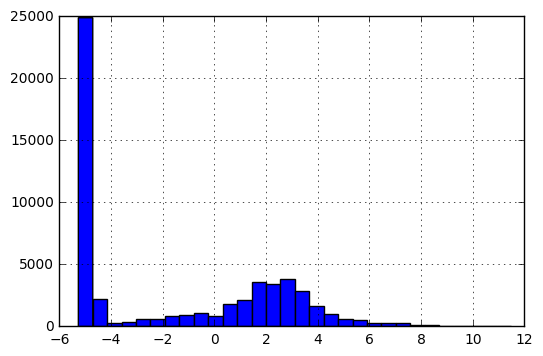

In [100]:
df[Accel].hist(bins=30, align='left')
plt.show()

In [101]:
threshold = 0
accelZeros = df[Accel] < threshold
accelOnes = df[Accel] >= threshold
df.ix[accelZeros, Accel] = 0
df.ix[accelOnes, Accel] = 1

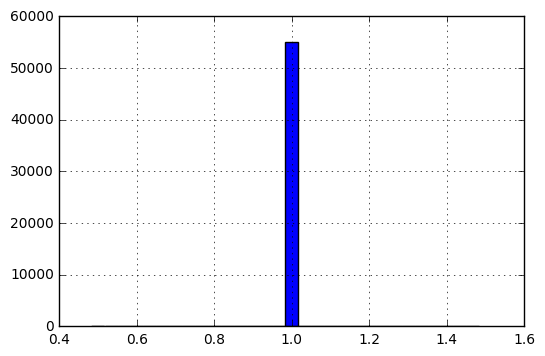

In [102]:
df[Accel].hist(bins=30, align='left')
plt.show()

In [90]:
df[Brake].describe()

count    55131.000000
mean         7.618379
std         12.302481
min         -0.322300
25%          0.107400
50%          0.214800
75%         21.806600
max         55.214800
Name: �u���[�L, dtype: float64

In [91]:
mmin = -0.322300
mmax = 55.214800
bin = (mmax - mmin)/30
mmin + bin*5

8.933883333333332

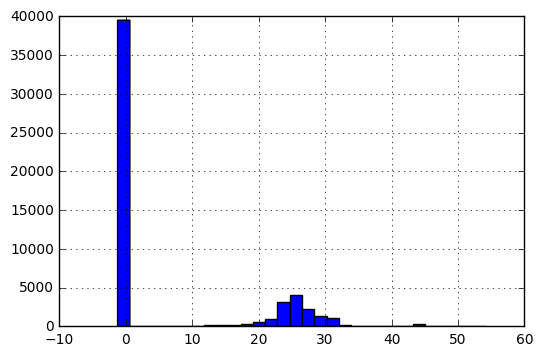

In [92]:
df[Brake].hist(bins=30, align='left')
plt.show()

In [93]:
threshold = 1
brakeZeros = df[Brake] < threshold
brakeOnes = df[Brake] >= threshold
df.ix[brakeZeros, Brake] = 0
df.ix[brakeOnes, Brake] = 1

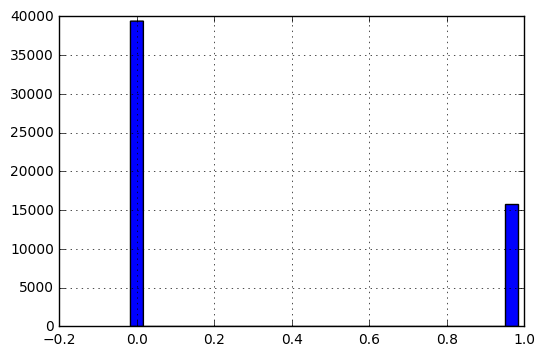

In [94]:
df[Brake].hist(bins=30, align='left')
plt.show()